In [1]:
#import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#load data file
data = pd.read_csv("Technical Task Dataset.csv")

In [4]:
data.shape #68650 rows and 36 columns

(68650, 36)

In [5]:
data.head()

,Registered Number,Date of Incorporation,Latest Accounts Date,Account Year,Trading Status,UK SIC Code,Registered or Trading Postcode,Bank Overdraft,Bank Postcode,Capital Expenditure,Cash At Bank,Director Loans (current),Director Loans (non-current),Directors Remuneration,EBIT,EBITDA,EBITDA + Directors Remuneration,Employees Remuneration,Highest Paid Director,Intangible Assets,Interest Expense,Leasehold,Number of Employees,Profit Before Tax + Directors Remuneration,Profit For The Year,"Property, Plant & Equipment",Retained Earnings,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Non Current Assets,Total Non Current Liabilities (Incl Provisions),Total Sales / Turnover,Wages,Working Capital
0,340228,12/05/1938 01:00,30/09/2006 01:00,2006.0,Liquidated/Receivership,1629.0,M3 3WR,2084953.0,SK11 6BS,-286133.0,1143.0,NaN,0.0,180449.0,-589010.0,-346093.0,-165644.0,1629707.0,NaN,0.0,309059.0,0.0,57.0,-482620.0,-636762.0,5576567.0,617128.0,7216172.0,1540296.0,3419378.0,3249408.0,5675876.0,547386.0,5611658.0,1448224.0,-1879082.0
1,340228,12/05/1938 01:00,30/09/2006 01:00,2005.0,Liquidated/Receivership,1629.0,M3 3WR,1163799.0,SK11 6BS,-280612.0,85.0,NaN,0.0,288846.0,108636.0,353988.0,642834.0,1810807.0,NaN,0.0,105337.0,0.0,83.0,292145.0,13943.0,5536779.0,1733347.0,7142253.0,1475456.0,2590161.0,4375050.0,5666797.0,177042.0,6458716.0,1600949.0,-1114705.0
2,340228,12/05/1938 01:00,30/09/2006 01:00,2004.0,Liquidated/Receivership,1629.0,M3 3WR,1100885.0,SK11 6BS,-345905.0,84.0,NaN,0.0,311702.0,100317.0,362589.0,674291.0,1840603.0,88264.0,0.0,97993.0,0.0,67.0,314026.0,3923.0,5490205.0,1711092.0,6931454.0,1300336.0,2229817.0,4363287.0,5631118.0,338350.0,6394847.0,1648708.0,-929481.0
3,340228,12/05/1938 01:00,30/09/2006 01:00,2003.0,Liquidated/Receivership,1629.0,M3 3WR,1231306.0,SK11 6BS,-394029.0,64747.0,NaN,0.0,310600.0,-11598.0,240450.0,551050.0,1625951.0,91079.0,0.0,88108.0,0.0,67.0,210894.0,-67050.0,5164837.0,1697557.0,6765656.0,1459906.0,2243529.0,4130040.0,5305750.0,392087.0,4720909.0,1464627.0,-783623.0
4,340228,12/05/1938 01:00,30/09/2006 01:00,2002.0,Liquidated/Receivership,1629.0,M3 3WR,994094.0,SK11 6BS,-353965.0,2335.0,NaN,0.0,306792.0,-203889.0,40899.0,347691.0,1614840.0,86006.0,0.0,76022.0,0.0,66.0,26881.0,-206213.0,5032717.0,1753916.0,6474687.0,1312062.0,1963457.0,4199269.0,5162625.0,311961.0,4462437.0,1461087.0,-651395.0


In [6]:
#check for number of null values in each col
for col in data.columns:
    print('"' + col + '"' + " number of null values:%d" %data[col].isnull().sum())

"Registered Number" number of null values:20
"Date of Incorporation" number of null values:46
"Latest Accounts Date" number of null values:40
"Account Year" number of null values:25
"Trading Status" number of null values:10
"UK SIC Code" number of null values:55
"Registered or Trading Postcode" number of null values:95
"Bank Overdraft" number of null values:32636
"Bank Postcode" number of null values:39622
"Capital Expenditure" number of null values:24444
"Cash At Bank" number of null values:4618
"Director Loans (current)" number of null values:46478
"Director Loans (non-current)" number of null values:16113
"Directors Remuneration" number of null values:18570
"EBIT" number of null values:12420
"EBITDA" number of null values:12427
"EBITDA + Directors Remuneration" number of null values:12452
"Employees Remuneration" number of null values:19130
"Highest Paid Director " number of null values:39699
"Intangible Assets" number of null values:4381
"Interest Expense" number of null values:124

In [7]:
#Exclude data where registered number is null (cannot identify the entity)
data = data[data["Registered Number"].notnull()]

In [8]:
#check if all groups contain 5 records
data['Registered Number'].value_counts(ascending = True)

7780328                                 5
3489295                                 5
257980                                  5
3182700                                 5
9225379                                 5
8463297                                 5
9887097                                 5
6597073                                 5
8955735                                 5
4623040                                 5
1974131                                 5
SC069229                                5
SC372365                                5
389061                                  5
2928651                                 5
3695845                                 5
3639100                                 5
10877316                                5
5209603                                 5
SC054143                                5
8225487                                 5
SC219017                                5
4773051                                 5
2984954                           

In [9]:
#check where date incorporated is inconsistent within a group and exclude - assuming this is the date the company 
#was founded and needs to be consistent

grouped = data.groupby(["Registered Number", "Date of Incorporation"])
grouped.filter(lambda x: x['Date of Incorporation'].count() != 5)

#-> we can see Account Year and Latest Accounts Date are not dates either; some values have been mixed up

,Registered Number,Date of Incorporation,Latest Accounts Date,Account Year,Trading Status,UK SIC Code,Registered or Trading Postcode,Bank Overdraft,Bank Postcode,Capital Expenditure,Cash At Bank,Director Loans (current),Director Loans (non-current),Directors Remuneration,EBIT,EBITDA,EBITDA + Directors Remuneration,Employees Remuneration,Highest Paid Director,Intangible Assets,Interest Expense,Leasehold,Number of Employees,Profit Before Tax + Directors Remuneration,Profit For The Year,"Property, Plant & Equipment",Retained Earnings,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Non Current Assets,Total Non Current Liabilities (Incl Provisions),Total Sales / Turnover,Wages,Working Capital
27795,Atomstone Limited,0,NaN,0.0,959000,NaN,137000,1986000.0,3914000,0.0,NaN,0.0,72000.0,NaN,102.0,3312000.0,0.0,NaN,0.0,0.0,1055000.0,908000.0,17483000.0,3480000.0,-1186000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44811,Tyrolese (266) Limited,0,EC4P4DQ,NaN,69287,NaN,NaN,860720.0,NaN,0.0,NaN,0.0,231362.0,0.0,44.0,NaN,NaN,NaN,NaN,NaN,329008.0,329008.0,16107826.0,NaN,-896919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44813,Tyrolese (266) Limited,30003,EC4P4DQ,NaN,11314,NaN,NaN,911366.0,NaN,0.0,NaN,0.0,240483.0,707442.0,35.0,NaN,NaN,NaN,NaN,NaN,418389.0,418389.0,15710984.0,NaN,-1152758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44817,Tyrolese (266) Limited,0,EC4P4DQ,0.0,156298,NaN,0,872852.0,1108635,0.0,0.0,0.0,257741.0,0.0,40.0,807200.0,0.0,NaN,0.0,0.0,403229.0,403224.0,15456515.0,976916.0,-1616570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44819,Tyrolese (266) Limited,1298569,EC4P4DQ,-231680.0,10473,NaN,0,832705.0,1023551,0.0,0.0,0.0,275181.0,NaN,36.0,807200.0,0.0,NaN,0.0,0.0,336038.0,348027.0,15480722.0,904523.0,-1917629.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45276,Hap Acquisitions Limited,0,MK40 1YN,NaN,NaN,0.0,849955,-3599246.0,3944216,0.0,244351.0,16620991.0,571980.0,33061.0,65.0,4770.0,NaN,103162.0,0.0,NaN,-4332910.0,-4375266.0,24120992.0,NaN,5064703.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45278,Hap Acquisitions Limited,0,MK40 1YN,NaN,60045,0.0,NaN,2128076.0,1532535,0.0,NaN,14705150.0,0.0,31110.0,73.0,4770.0,NaN,0.0,0.0,NaN,1983042.0,2331058.0,37455352.0,NaN,17626896.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45280,Hap Acquisitions Limited,0,MK40 1YN,NaN,NaN,0.0,NaN,-1347222.0,1662888,-1700000.0,NaN,13065538.0,0.0,0.0,70.0,3825.0,NaN,517699.0,0.0,NaN,-1143831.0,1199961.0,27249220.0,NaN,259400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45284,Hap Acquisitions Limited,0,MK40 1YN,-1694051.0,1474240,21596.0,573416,-1395490.0,1691904,0.0,131350.0,3293000.0,39321.0,0.0,25.0,3117.0,NaN,NaN,0.0,0.0,-1410635.0,-1775557.0,7487093.0,1432470.0,2507628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55825,Dart Valley Railway PLC,38765,EX4 3ZB,0.0,805065,NaN,424058,2419987.0,2446883,0.0,196935.0,0.0,25089.0,NaN,118.0,260917.0,0.0,NaN,0.0,0.0,2141724.0,1417934.0,8693741.0,2228660.0,553122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Exclude above records

#create a list of the unique reg numbers to be excluded
reg_numers_to_exclude = grouped.filter(lambda x: x['Date of Incorporation'].count() != 5)['Registered Number']\
.drop_duplicates().tolist()

data = data[~data['Registered Number'].isin(reg_numers_to_exclude)]

In [11]:
data['Account Year'].value_counts(dropna = False) #there're some negative/non-year values

 2015.0      10931
 2016.0      10787
 2017.0      10652
 2018.0      10411
 2014.0       6501
 2019.0       4566
 2004.0       1068
 2005.0       1061
 2003.0       1035
 2006.0       1022
 2007.0        977
 2002.0        897
 2008.0        857
 2013.0        797
 2009.0        797
 2001.0        793
 2010.0        759
 2011.0        746
 2000.0        724
 2012.0        710
 1999.0        635
 1998.0        514
 1997.0        426
 1996.0        331
 1995.0        217
 1994.0        132
 1993.0         89
 1992.0         45
 1991.0         31
 1990.0         18
 1989.0         14
 1988.0         11
 NaN             9
 0.0             9
 1987.0          8
 1986.0          5
 1985.0          3
 1984.0          2
 2020.0          2
 1983.0          1
-174026.0        1
-33580.0         1
Name: Account Year, dtype: int64

In [12]:
#Latest Accounts Date to datetime format
data['Latest Accounts Date'] =  pd.to_datetime(data['Latest Accounts Date'],
                                               format = "%d/%m/%Y %H:%M", errors = 'coerce') #any non-date values -> NaT

In [13]:
#Exclude where Account Year or Latest Accounts Date are null/0
data = data[~((data['Account Year'] <=0) | (data['Account Year'].isnull()) | (data['Latest Accounts Date'].isnull()))]

In [14]:
#check target values
data['Trading Status'].value_counts(dropna = False) 

Active                     53730
Dissolved                  13260
Liquidated/Receivership     1585
Name: Trading Status, dtype: int64

In [15]:
#check for consistency of target value

grouped = data.groupby(["Registered Number", "Trading Status"])
grouped.filter(lambda x: x['Trading Status'].count() != 5)

,Registered Number,Date of Incorporation,Latest Accounts Date,Account Year,Trading Status,UK SIC Code,Registered or Trading Postcode,Bank Overdraft,Bank Postcode,Capital Expenditure,Cash At Bank,Director Loans (current),Director Loans (non-current),Directors Remuneration,EBIT,EBITDA,EBITDA + Directors Remuneration,Employees Remuneration,Highest Paid Director,Intangible Assets,Interest Expense,Leasehold,Number of Employees,Profit Before Tax + Directors Remuneration,Profit For The Year,"Property, Plant & Equipment",Retained Earnings,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Non Current Assets,Total Non Current Liabilities (Incl Provisions),Total Sales / Turnover,Wages,Working Capital


In [16]:
#create a Target variable: 0 non-default, 1 default
data['Default'] = np.where(data['Trading Status']=='Active', 0, 1)
data = data.drop(['Trading Status'], axis = 1)

In [17]:
#check if there's a discrepancy between account year and latest accounts date
data[data['Account Year'] > data['Latest Accounts Date'].dt.year]

,Registered Number,Date of Incorporation,Latest Accounts Date,Account Year,UK SIC Code,Registered or Trading Postcode,Bank Overdraft,Bank Postcode,Capital Expenditure,Cash At Bank,Director Loans (current),Director Loans (non-current),Directors Remuneration,EBIT,EBITDA,EBITDA + Directors Remuneration,Employees Remuneration,Highest Paid Director,Intangible Assets,Interest Expense,Leasehold,Number of Employees,Profit Before Tax + Directors Remuneration,Profit For The Year,"Property, Plant & Equipment",Retained Earnings,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Non Current Assets,Total Non Current Liabilities (Incl Provisions),Total Sales / Turnover,Wages,Working Capital,Default


In [18]:
#check for consistency of company's postcode
grouped = data.groupby(["Registered Number", "Registered or Trading Postcode"])
grouped.filter(lambda x: x['Registered or Trading Postcode'].count() != 5)

,Registered Number,Date of Incorporation,Latest Accounts Date,Account Year,UK SIC Code,Registered or Trading Postcode,Bank Overdraft,Bank Postcode,Capital Expenditure,Cash At Bank,Director Loans (current),Director Loans (non-current),Directors Remuneration,EBIT,EBITDA,EBITDA + Directors Remuneration,Employees Remuneration,Highest Paid Director,Intangible Assets,Interest Expense,Leasehold,Number of Employees,Profit Before Tax + Directors Remuneration,Profit For The Year,"Property, Plant & Equipment",Retained Earnings,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Non Current Assets,Total Non Current Liabilities (Incl Provisions),Total Sales / Turnover,Wages,Working Capital,Default


In [19]:
#check for consistency of industry
grouped = data.groupby(["Registered Number", "UK SIC Code"])
grouped.filter(lambda x: x['UK SIC Code'].count() != 5)

,Registered Number,Date of Incorporation,Latest Accounts Date,Account Year,UK SIC Code,Registered or Trading Postcode,Bank Overdraft,Bank Postcode,Capital Expenditure,Cash At Bank,Director Loans (current),Director Loans (non-current),Directors Remuneration,EBIT,EBITDA,EBITDA + Directors Remuneration,Employees Remuneration,Highest Paid Director,Intangible Assets,Interest Expense,Leasehold,Number of Employees,Profit Before Tax + Directors Remuneration,Profit For The Year,"Property, Plant & Equipment",Retained Earnings,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Non Current Assets,Total Non Current Liabilities (Incl Provisions),Total Sales / Turnover,Wages,Working Capital,Default


In [20]:
data['Number of Employees'].describe()

count     52773.000000
mean        181.574119
std        2511.649000
min           0.000000
25%          43.000000
50%          88.000000
75%         172.000000
max      561000.000000
Name: Number of Employees, dtype: float64

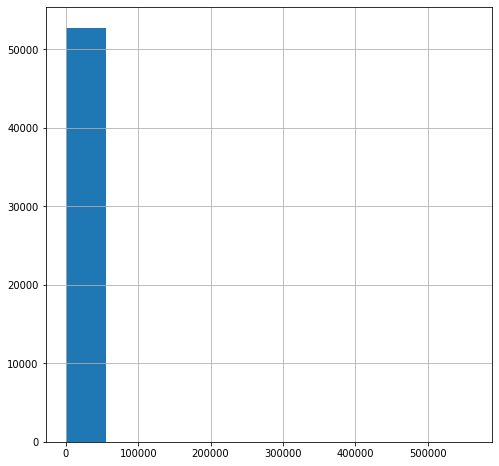

In [21]:
data['Number of Employees'].hist(figsize=[8,8]) # there're some outliers in the data

In [22]:
#add median number of employees per group
data.loc[:,'median_employees'] = data.groupby('Registered Number')['Number of Employees'].transform('median')

In [23]:
#create average profit
data.loc[:,'avg_profit'] = data.groupby('Registered Number')['Profit For The Year'].transform('mean')

In [24]:
#Add a column to keep track of the number of employees of T-1 (T2) where T = most recent Account Year per group
temp_df = data[data['Account Year'] == data['Latest Accounts Date'].dt.year-1][['Number of Employees', 'Registered Number']]

data = data.merge(temp_df, how = 'left', on = 'Registered Number')\
.rename(columns = {"Number of Employees_y":"Number of Employees T2", "Number of Employees_x":"Number of Employees"})

In [25]:
#number of employees between T and T-1 account dates
data['latest_employee_diff'] = data['Number of Employees'] - data['Number of Employees T2']

In [26]:
#check for number of null values in each col
cols_to_exclude = [] #store column names with many null values

for col in data.columns:
    print('"' + col + '"' + " number of null values:%d" %data[col].isnull().sum())
    
    #exclude columns that have many null values
    if data[col].isnull().sum() > 0.35*data.shape[0]:
        if col != "Director Loans (current)":
            cols_to_exclude.append(col)
        

"Registered Number" number of null values:0
"Date of Incorporation" number of null values:5
"Latest Accounts Date" number of null values:0
"Account Year" number of null values:0
"UK SIC Code" number of null values:0
"Registered or Trading Postcode" number of null values:85
"Bank Overdraft" number of null values:32631
"Bank Postcode" number of null values:39615
"Capital Expenditure" number of null values:24439
"Cash At Bank" number of null values:4591
"Director Loans (current)" number of null values:46474
"Director Loans (non-current)" number of null values:16108
"Directors Remuneration" number of null values:18528
"EBIT" number of null values:12414
"EBITDA" number of null values:12414
"EBITDA + Directors Remuneration" number of null values:12414
"Employees Remuneration" number of null values:19069
"Highest Paid Director " number of null values:39686
"Intangible Assets" number of null values:4359
"Interest Expense" number of null values:12470
"Leasehold" number of null values:24542
"Num

In [27]:
data = data.drop(cols_to_exclude, axis =1)

In [28]:
#populate director's remineration

data['Directors Remuneration'] = np.where(data['Directors Remuneration'].isnull(), 
                                         data['EBITDA + Directors Remuneration'] - data['EBITDA'],
                                         data['Directors Remuneration'])

In [29]:
#remove postcodes
data = data.drop(['Registered or Trading Postcode', 'Number of Employees', 'Wages'], axis =1)

#take Latest Accounts Date where Date of incorporation is blank
data['Date of Incorporation'] = np.where(data['Date of Incorporation'].isnull(), data['Latest Accounts Date'],\
                                        data['Date of Incorporation'])

In [30]:
#we're interested in the most recent values of these features rather than averages (if present)
features_keep_latest_value = ['Cash At Bank'
                              , 'EBIT'
                              , 'EBITDA'
                              , 'EBITDA + Directors Remuneration'
                              , 'Directors Remuneration'
                              , 'Employees Remuneration'
                              , 'Intangible Assets'
                              , 'Interest Expense'
                              , 'Profit Before Tax + Directors Remuneration'
                              , 'Profit For The Year'
                              , 'Property, Plant & Equipment'
                              , 'Retained Earnings'
                              , 'Total Assets'
                              , 'Total Current Assets'
                              , 'Total Current Liabilities'
                              , 'Total Equity'
                              , 'Total Non Current Assets'
                              , 'Total Non Current Liabilities (Incl Provisions)'
                              , 'Total Sales / Turnover'
                              , 'Working Capital'
                              , 'median_employees'
                              , 'avg_profit'
                              , 'Number of Employees T2'
                              , 'latest_employee_diff'
                              ]

features_to_replace_na = ['Director Loans (non-current)', 'Director Loans (current)']

In [31]:
#assume if director's loan is na, there isn't one
for feat in features_to_replace_na:
    data[feat] = data[feat].fillna(0)

In [32]:
#calc median - if latest value is null, replace with median
for feat in features_keep_latest_value:
    data[feat] = np.where(data[feat].notnull(), data[feat],
                         data.groupby('Registered Number')[feat].transform('median'))

In [33]:
#final dataset
filtered_df = data[data['Account Year'] == data['Latest Accounts Date'].dt.year]

In [34]:
#take year of datetime features
filtered_df['Date of Incorporation'] = pd.to_datetime(filtered_df['Date of Incorporation'],\
                                                               format = "%d/%m/%Y %H:%M", errors = 'coerce').dt.year

In [35]:
#fill NA values
filtered_df['Date of Incorporation'] = np.where(filtered_df['Date of Incorporation'].isnull(),\
                                                filtered_df['Account Year'],
                                               filtered_df['Date of Incorporation'])

In [36]:
#populate director's remineration

filtered_df['Directors Remuneration'] = np.where(filtered_df['Directors Remuneration'].isnull(), 
                                         filtered_df['EBITDA + Directors Remuneration'] - filtered_df['EBITDA'],
                                         filtered_df['Directors Remuneration'])

In [37]:
#drop columns with many NA values and no logic to derive using other fields
filtered_df = filtered_df.drop(['Number of Employees T2'
                                , 'Employees Remuneration'
                               ], axis = 1)

In [38]:
#check for number of null values in each col

for col in filtered_df.columns:
    print('"' + col + '"' + " number of null values:%d" %filtered_df[col].isnull().sum())

"Registered Number" number of null values:0
"Date of Incorporation" number of null values:0
"Latest Accounts Date" number of null values:0
"Account Year" number of null values:0
"UK SIC Code" number of null values:0
"Cash At Bank" number of null values:37
"Director Loans (current)" number of null values:0
"Director Loans (non-current)" number of null values:0
"Directors Remuneration" number of null values:15
"EBIT" number of null values:15
"EBITDA" number of null values:15
"EBITDA + Directors Remuneration" number of null values:15
"Intangible Assets" number of null values:18
"Interest Expense" number of null values:16
"Profit Before Tax + Directors Remuneration" number of null values:15
"Profit For The Year" number of null values:15
"Property, Plant & Equipment" number of null values:18
"Retained Earnings" number of null values:19
"Total Assets" number of null values:187
"Total Current Assets" number of null values:15
"Total Current Liabilities" number of null values:15
"Total Equity" 

In [39]:
filtered_df[filtered_df['Intangible Assets'].isnull()] #for records where intangible assets is not populated,
                                                        #most of the other features aren't populated either

,Registered Number,Date of Incorporation,Latest Accounts Date,Account Year,UK SIC Code,Cash At Bank,Director Loans (current),Director Loans (non-current),Directors Remuneration,EBIT,EBITDA,EBITDA + Directors Remuneration,Intangible Assets,Interest Expense,Profit Before Tax + Directors Remuneration,Profit For The Year,"Property, Plant & Equipment",Retained Earnings,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Non Current Assets,Total Non Current Liabilities (Incl Provisions),Total Sales / Turnover,Working Capital,Default,median_employees,avg_profit,latest_employee_diff
1050,10430672,2016.0,2017-08-31 01:00:00,2017.0,4932.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
16715,10663033,2017.0,2018-12-31 00:00:00,2018.0,4321.0,NaN,0.0,0.0,0.0,440000.0,440000.0,440000.0,NaN,0.0,440000.0,440000.0,NaN,0.0,1473213.0,1473006.0,272800.0,1200113.0,207.0,300.0,0.0,1200206.0,0,NaN,440000.0,NaN
17265,30177,2019.0,2019-09-30 01:00:00,2019.0,1105.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
19465,118587,1911.0,2018-06-30 01:00:00,2018.0,4764.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
22415,4297788,2001.0,2018-12-31 00:00:00,2018.0,7010.0,2155000.0,0.0,0.0,180000.0,1405000.0,1405000.0,1585000.0,NaN,0.0,1588000.0,1138000.0,NaN,4419000.0,5767000.0,3693000.0,622000.0,5145000.0,2074000.0,0.0,1908000.0,3071000.0,0,2.0,786600.0,0.0
27775,2389907,1989.0,2018-12-31 00:00:00,2018.0,9312.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
37390,7275637,2010.0,2019-03-31 00:00:00,2019.0,8690.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
44155,165746,1920.0,2019-03-31 00:00:00,2019.0,7911.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
44610,9062378,2014.0,2018-12-31 00:00:00,2018.0,8299.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
44775,2800634,1993.0,2018-12-31 00:00:00,2018.0,56301.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [40]:
#remove records where intangible assets/retained earnings are blank as the 2 features are expected to be important
#for the model
filtered_df = filtered_df[filtered_df['Intangible Assets'].notnull()]
filtered_df = filtered_df[filtered_df['Retained Earnings'].notnull()]

In [41]:
#derive total assets
filtered_df['Total Assets'] = np.where(filtered_df['Total Assets'].isnull(),
                                      filtered_df['Total Current Assets'] + filtered_df['Total Non Current Assets'],
                                      filtered_df['Total Assets'])

In [42]:
filtered_df = filtered_df[filtered_df['Total Assets'].notnull()]

In [43]:
#retained earnings/total assets -Retained earnings to total assets is a ratio which helps in measuring 
#the profitability of the assets of an entity. It illustrates how much profits over all the years since 
#inception were generated from $1 of total assets.

filtered_df['RE/TA'] = (filtered_df['Retained Earnings']/filtered_df['Total Assets']).round(4)
filtered_df['RE/TA'] = filtered_df['RE/TA'].fillna(0)
filtered_df = filtered_df.replace([np.inf, -np.inf], 0)


In [44]:
#very few blank cash at bank values -> populate with 0 instead
filtered_df['Cash At Bank'] = filtered_df['Cash At Bank'].fillna(0)

In [45]:
#turn into categories - positive/negative/same values
filtered_df['latest_employee_diff'] = np.where((filtered_df['latest_employee_diff'].isnull()) |\
                                               (filtered_df['latest_employee_diff'] == 0), "same",
                                               np.where(filtered_df['latest_employee_diff'] >0, "p", "n"))

In [46]:
filtered_df = filtered_df.drop(['median_employees'], axis = 1) # too many NAs

In [47]:
#years between company's incorporation and latest account
filtered_df['comp_life'] = filtered_df['Account Year'] - filtered_df['Date of Incorporation']

# Model

In [48]:
#split into train/test
X = filtered_df.drop(['Default', 'Registered Number', 'Latest Accounts Date'
                     , 'Account Year', 'Date of Incorporation', 'UK SIC Code'], axis =1)
y = filtered_df[['Default']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=5)

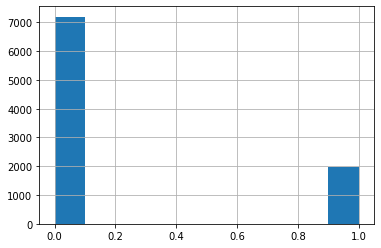

In [49]:
y_train['Default'].hist() # class imbalance

# User random oversampling to balance categories training data

In [50]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(X_train, y_train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E468C821C8>]],
      dtype=object)

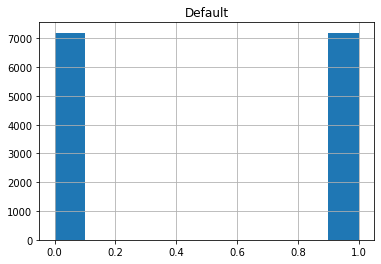

In [51]:
y_ros.hist()

In [52]:
#categorical variables to dummies
X_ros = pd.get_dummies(X_ros, columns=['latest_employee_diff'])
X_test = pd.get_dummies(X_test, columns=['latest_employee_diff'])

Train a Randon Forest model using default parameters

In [53]:
##RF with default params
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 6) #initialize a RF classifier
rf_model.fit(X_ros,y_ros) #fit training data
preds = rf_model.predict(X_test) #store predicted values

In [54]:
#Confusion matrix
pd.DataFrame(confusion_matrix(y_test, preds))

#TP: 531
#FP: 254
#TN: 3276
#FN: 458

,0,1
0,3272,258
1,472,517


In [55]:
#tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [56]:
rf_model.classes_

array([0, 1])

In [57]:
#calc ROC score to validate model's performance
preds_prob = rf_model.predict_proba(X_test) #probability that an example belongs to class 1/0 (highest class first)

y_scores = []
for l in preds_prob:
    y_scores.append(l[1])

In [58]:
print(roc_auc_score(y_test, y_scores))

0.8659290438449002


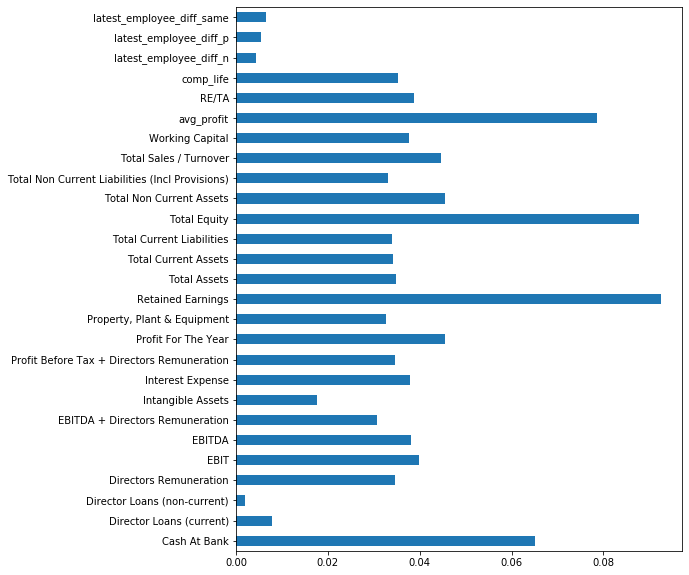

In [59]:
#Check feature importances
feat_importances = pd.Series(rf_model.feature_importances_, index=X_ros.columns)
feat_importances.plot(kind='barh', figsize = (8,10))

In [60]:
#Forward features importance

## Run the RF model adding one feature at a time, taking the combination of features which give the largest AUC score and 
##stopping as soon as adding an additional feature to the model decreases the AUC compared to the previous round

features = X_ros.columns

features_list=[]
best_features_set = [] #stores the final set of features to use

for i in range(1,len(features)+1): #Iter 1 ->train on 1 feature, Iter 2 -> train on 2 features ,etc...
    print("Iteration no:%d"%i)
    auc_list = [] #store AUC scores per iteration
    if i == 1: #Round 1
        for feature in features:
            model =RandomForestClassifier(random_state = 7) #Initialize a RF model
            model.fit(X_ros[[feature]],y_ros) #fit the training data
            preds = model.predict_proba(X_test[[feature]]) #predictions
            #store probabilities for class 0
            y_scores = []
            for l in preds:
                y_scores.append(l[1])
                
            auc_list.append(roc_auc_score(y_test, y_scores)) #a list with all the AUC scores for the respective iteration
        print('Max AUC:%s with feature %s' %(max(auc_list), features[auc_list.index(max(auc_list))]))
        print()
        features_list.append(features[auc_list.index(max(auc_list))]) #add the feature that gives the largest AUC at the respective round
        features = [item for item in X_ros.columns if item not in features_list] #remove the chosen feature from the list of features to loop through
        last_score = max(auc_list) #store the latest AUC score
        best_features_set = features_list
    else: #Every other round after round 1
        for feature in features:
            features_to_train_on = [feature] + features_list 
            #print(features_to_train_on)
            model = RandomForestClassifier(random_state = 7) #Initialize a RF model
            model.fit(X_ros[features_to_train_on],y_ros) #fit the training data
            preds = model.predict_proba(X_test[features_to_train_on])
            y_scores = []
            for l in preds:
                y_scores.append(l[1])
            auc_list.append(roc_auc_score(y_test, y_scores))
        print('Max AUC:%s with feature %s' %(max(auc_list), features[auc_list.index(max(auc_list))]))
        print()
        
        #if AUC for any features combination for the current iterration > highest score for prev iteration
        if max(auc_list) > last_score:
            last_score = max(auc_list) #update last score
            features_list.append(features[auc_list.index(max(auc_list))]) #output best features
            features = [item for item in X_ros.columns if item not in features_list]
        else:
            print("break") #Break the loop if adding a new feature increases the RMSE score from the previous round
            print(features_list)
            break
            

Iteration no:1
Max AUC:0.6698983435352618 with feature Retained Earnings

Iteration no:2
Max AUC:0.7356058284185532 with feature Cash At Bank

Iteration no:3
Max AUC:0.784888303921035 with feature Profit For The Year

Iteration no:4
Max AUC:0.8056316363855096 with feature Total Current Liabilities

Iteration no:5
Max AUC:0.820899870244073 with feature Total Non Current Assets

Iteration no:6
Max AUC:0.8368546934122372 with feature Interest Expense

Iteration no:7
Max AUC:0.8478283784519229 with feature avg_profit

Iteration no:8
Max AUC:0.8562424631284068 with feature Directors Remuneration

Iteration no:9
Max AUC:0.8580036205627339 with feature Total Non Current Liabilities (Incl Provisions)

Iteration no:10
Max AUC:0.8608446452049028 with feature Total Sales / Turnover

Iteration no:11
Max AUC:0.8638780122423141 with feature Profit Before Tax + Directors Remuneration

Iteration no:12
Max AUC:0.8657997175731917 with feature comp_life

Iteration no:13
Max AUC:0.8665418756462733 with fe

In [61]:
#####################

Testing

In [62]:
import statsmodels.api as sm
log_reg = sm.Logit(y_ros, X_ros).fit() 
print(log_reg.summary()) 


Optimization terminated successfully.
         Current function value: 0.603990
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                Default   No. Observations:                14392
Model:                          Logit   Df Residuals:                    14365
Method:                           MLE   Df Model:                           26
Date:                Thu, 17 Dec 2020   Pseudo R-squ.:                  0.1286
Time:                        10:16:03   Log-Likelihood:                -8692.6
converged:                       True   LL-Null:                       -9975.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Cash At Bank                     

In [63]:
yhat = log_reg.predict(X_test) 
prediction = list(map(round, yhat)) 

In [64]:
print(roc_auc_score(y_test, prediction))

0.6789222524254046
